In [2]:
import os
from neo4j import GraphDatabase
import pandas as pd

os.environ['NEO4J_BOLT_URL']='bolt://localhost:7687'
os.environ['NEO_PASS']='rl123456'
os.environ['NEO_USER']='neo4j'


In [25]:
uri = "bolt://localhost:7687"  # or your remote URI
username = "neo4j"
password = "rl123456"


driver = GraphDatabase.driver(uri, auth=(username, password))

def get_action_repr(tx):
    query = """
    USE outcomesmall
    MATCH (a:ActionRepr)
    RETURN a.id AS action_id, a.value AS embedding, a.obj_type AS obj_type
    """
    result = tx.run(query)
    return [(record["action_id"], record["embedding"], record["obj_type"]) for record in result]

with driver.session() as session:
    data = session.read_transaction(get_action_repr)

# Close driver
driver.close()

C:\Users\WorkStation\AppData\Local\Temp\ipykernel_12868\4251516460.py:18: DeprecationWarning: read_transaction has been renamed to execute_read
  data = session.read_transaction(get_action_repr)


In [26]:
import numpy as np

# Unpack the data
action_ids, embeddings, obj_types = zip(*data)

# Convert to numpy arrays
X = np.array(embeddings)
obj_types = np.array(obj_types)


In [27]:
X

array([[-15.81382465,  18.70278168, -24.61107445, ...,  22.34642982,
        -20.23412895,  20.90710068],
       [-16.25267029,  20.14975739, -25.936409  , ...,  23.7359314 ,
        -19.45352173,  21.20794487],
       [-15.58337116,  19.63132668, -25.81398392, ...,  22.94428825,
        -19.68829536,  20.49770164],
       ...,
       [  0.79134433,   0.21364221,   0.37324055, ...,   0.47048998,
          0.88378023,   0.96590501],
       [  0.62905507,   0.89219353,   0.28656415, ...,   0.48055186,
          0.2513273 ,   0.94493012],
       [  0.60588496,   0.79078327,   0.34832284, ...,   0.26530062,
          0.90369567,   0.64240854]])

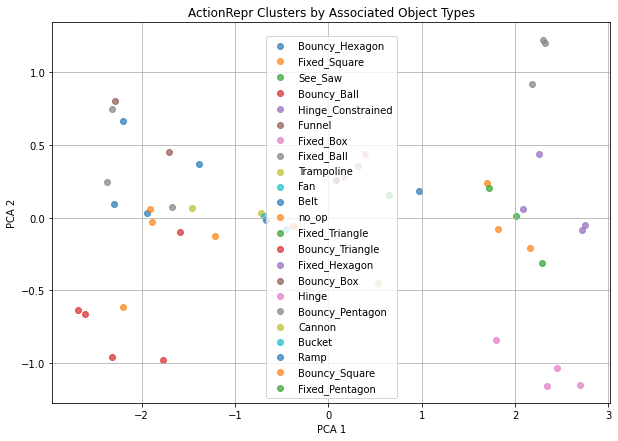

In [11]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
X_pca = PCA(n_components=2).fit_transform(X)

# Cluster
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X)

# Plot with object types
plt.figure(figsize=(10, 7))
for obj_type in set(obj_types):
    mask = obj_types == obj_type
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=obj_type, alpha=0.7)

plt.title("ActionRepr Clusters by Associated Object Types")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
df_filter 

,action_id,obj_type,PCA1,PCA2
0,None,Trampoline,-21.504585,-1.791399
1,None,See_Saw,-23.460293,-1.300302
2,None,Trampoline,-21.331273,-2.307646
3,None,Ramp,-24.107077,1.990348
6,None,Trampoline,-22.584341,-1.808780
...,...,...,...,...
14795,None,Bucket,-22.208156,0.713447
14806,None,Ramp,-24.303603,1.443315
14807,None,Cannon,-23.156079,-0.125014
14808,None,Ramp,-23.558106,0.471629


In [34]:
df_filtered_15 = df_filter.groupby('obj_type').head(15).reset_index(drop=True)


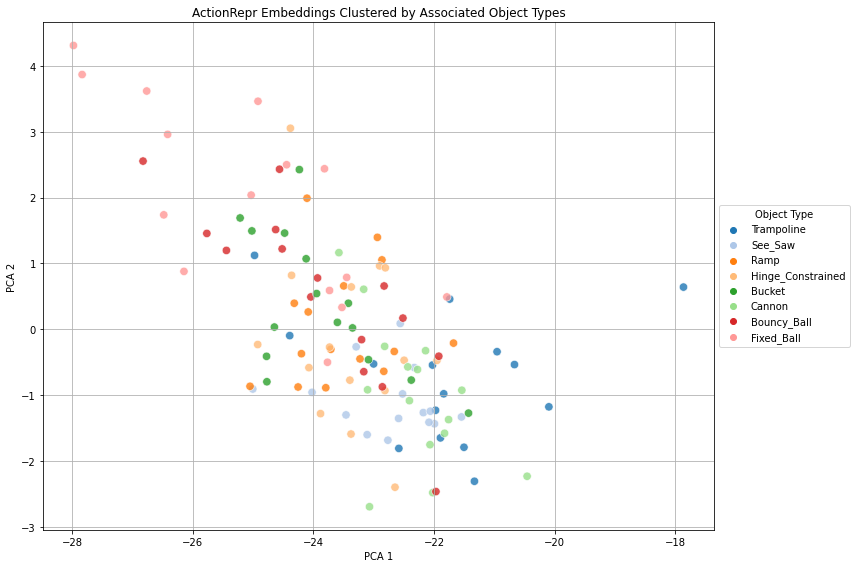

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you already have these lists from Neo4j query
# action_ids, embeddings, obj_types

# Prepare the dataframe
# df = pd.DataFrame({
#     "action_id": action_ids,
#     "obj_type": obj_types
# })
embedding_matrix = np.array(embeddings)

# PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_matrix)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtered_15,
    x="PCA1",
    y="PCA2",
    hue="obj_type",
    palette="tab20",
    s=70,
    alpha=0.8,
    legend='full'
)
plt.title("ActionRepr Embeddings Clustered by Associated Object Types")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Object Type")
plt.grid(True)
plt.tight_layout()
plt.show()


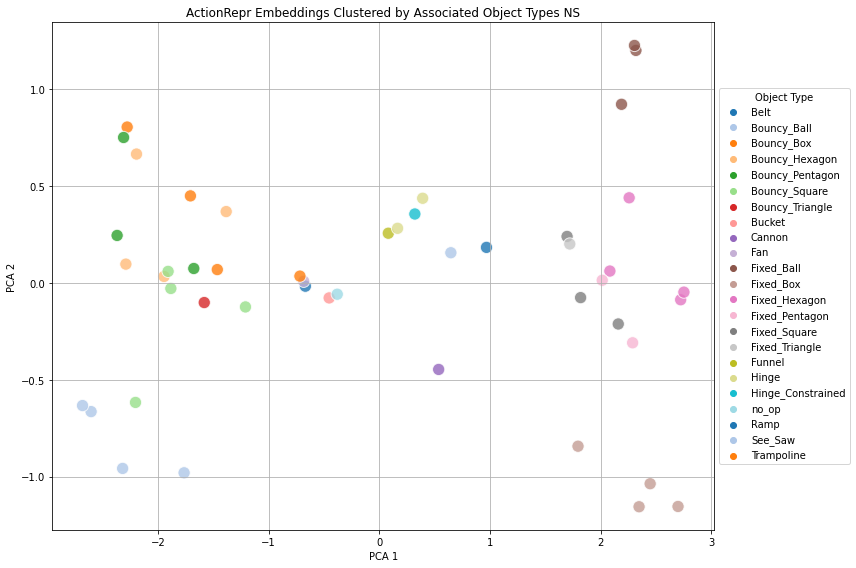

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="PCA1",
    y="PCA2",
    hue="obj_type",
    palette="tab20",
    s=150,  # Increased from 70 to 150
    alpha=0.8,
    legend='full'
)
plt.title("ActionRepr Embeddings Clustered by Associated Object Types NS")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Object Type")
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
df_filtered

,action_id,obj_type,PCA1,PCA2,category,y
0,None,Bouncy_Ball,-1.764927,-0.980716,Bouncy,0.000000
1,None,Bouncy_Ball,-2.320278,-0.958151,Bouncy,0.029412
2,None,Bouncy_Ball,-2.605157,-0.664687,Bouncy,0.058824
3,None,Bouncy_Ball,-2.682670,-0.633454,Bouncy,0.088235
4,None,Bouncy_Box,-1.707660,0.449367,Bouncy,0.117647
5,None,Bouncy_Box,-2.279242,0.804682,Bouncy,0.147059
6,None,Bouncy_Hexagon,-1.384479,0.368297,Bouncy,0.176471
7,None,Bouncy_Hexagon,-1.946073,0.033245,Bouncy,0.205882
8,None,Bouncy_Hexagon,-2.291040,0.096853,Bouncy,0.235294
9,None,Bouncy_Hexagon,-2.194812,0.665236,Bouncy,0.264706


In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create category from obj_type
df['category'] = df['obj_type'].apply(lambda x: 'Bouncy' if 'Bouncy' in x or x == 'Trampoline' else ('Fixed' if 'Fixed' in x else 'Other'))

# Filter only Bouncy and Fixed
df_filtered = df[df['category'].isin(['Bouncy', 'Fixed'])].copy()

# Perform PCA on the corresponding embeddings
embedding_matrix = np.array(embeddings)  # from earlier Neo4j extraction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_matrix)

# Add PCA components to dataframe
df_filtered['PCA1'] = pca_result[:, 0]
df_filtered['PCA2'] = pca_result[:, 1]

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x="PCA1",
    y="PCA2",
    hue="category",
    style="obj_type",  # optional: use shapes to differentiate object types
    palette={"Bouncy": "blue", "Fixed": "orange"},
    s=150
)
plt.title("PCA of ActionRepr Embeddings: Bouncy vs Fixed Objects")
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: Length of values (48) does not match length of index (37)

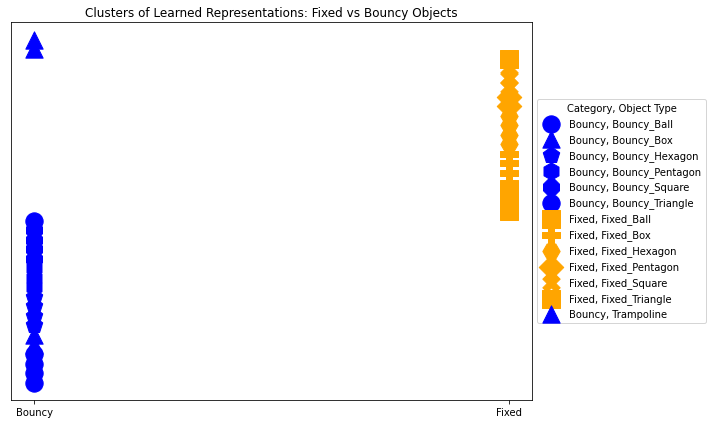

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Assign categories (if not already done)
df_filtered['category'] = df_filtered['obj_type'].apply(
    lambda x: 'Bouncy' if 'Bouncy' in x or x == 'Trampoline' else 'Fixed'
)

# Step 2: Sort and assign vertical spacing
df_filtered = df_filtered.sort_values(by='obj_type')
df_filtered['y'] = np.arange(len(df_filtered))

# Step 3: Set category-wise markers and color
category_marker_map = {
    'Bouncy': ['o', '^', 'p', 'h', '8'],  # circle, triangle, plus, hexagon, octagon
    'Fixed': ['s', 'P', 'H', 'D', 'X']    # square, plus (filled), hexagon, diamond, X
}
color_map = {'Bouncy': 'blue', 'Fixed': 'orange'}

# Step 4: Track marker usage for object types
used_markers = {'Bouncy': {}, 'Fixed': {}}

# Step 5: Plot
plt.figure(figsize=(10, 6))

for i, row in df_filtered.iterrows():
    cat = row['category']
    obj = row['obj_type']

    # Assign a marker from the category pool
    if obj not in used_markers[cat]:
        available = category_marker_map[cat]
        used_markers[cat][obj] = available[len(used_markers[cat]) % len(available)]
    marker = used_markers[cat][obj]
    
    plt.scatter(cat, row['y'], 
                marker=marker, 
                color=color_map[cat], 
                s=300, 
                label=f"{cat}, {obj}")

# Clean legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Category, Object Type", 
           loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Clusters of Learned Representations: Fixed vs Bouncy Objects")
plt.xticks(['Bouncy', 'Fixed'])
plt.yticks([])
plt.grid(axis='y')
plt.tight_layout()
plt.show()
